<a href="https://colab.research.google.com/github/CyperVoid/all-simplified-ml-labs/blob/main/exam_friendly_ml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

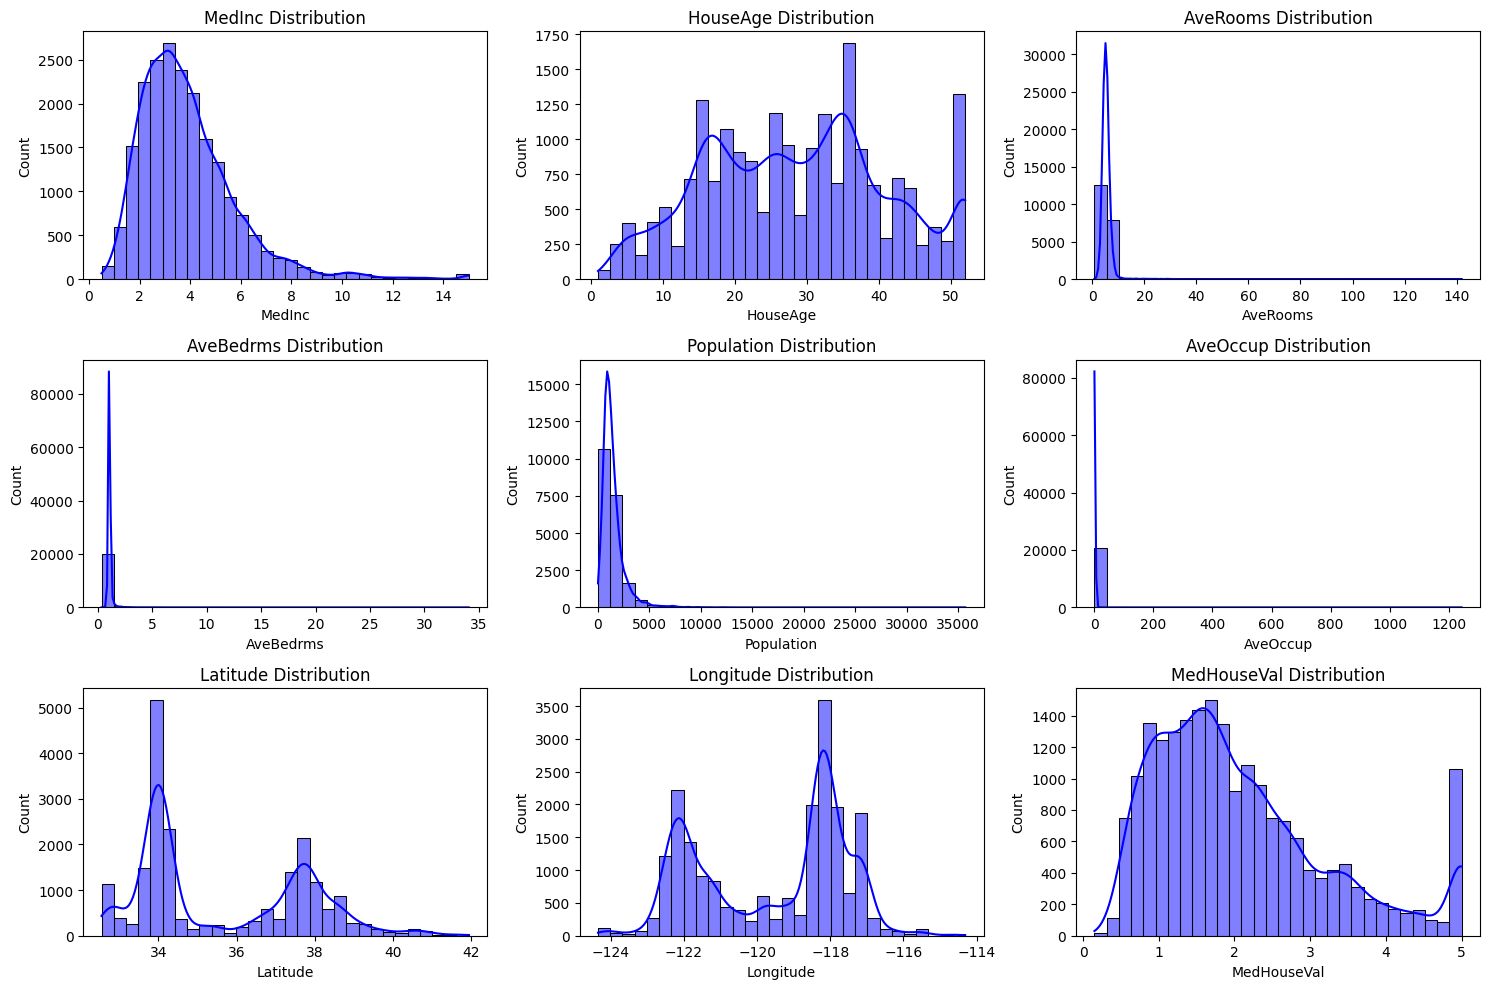

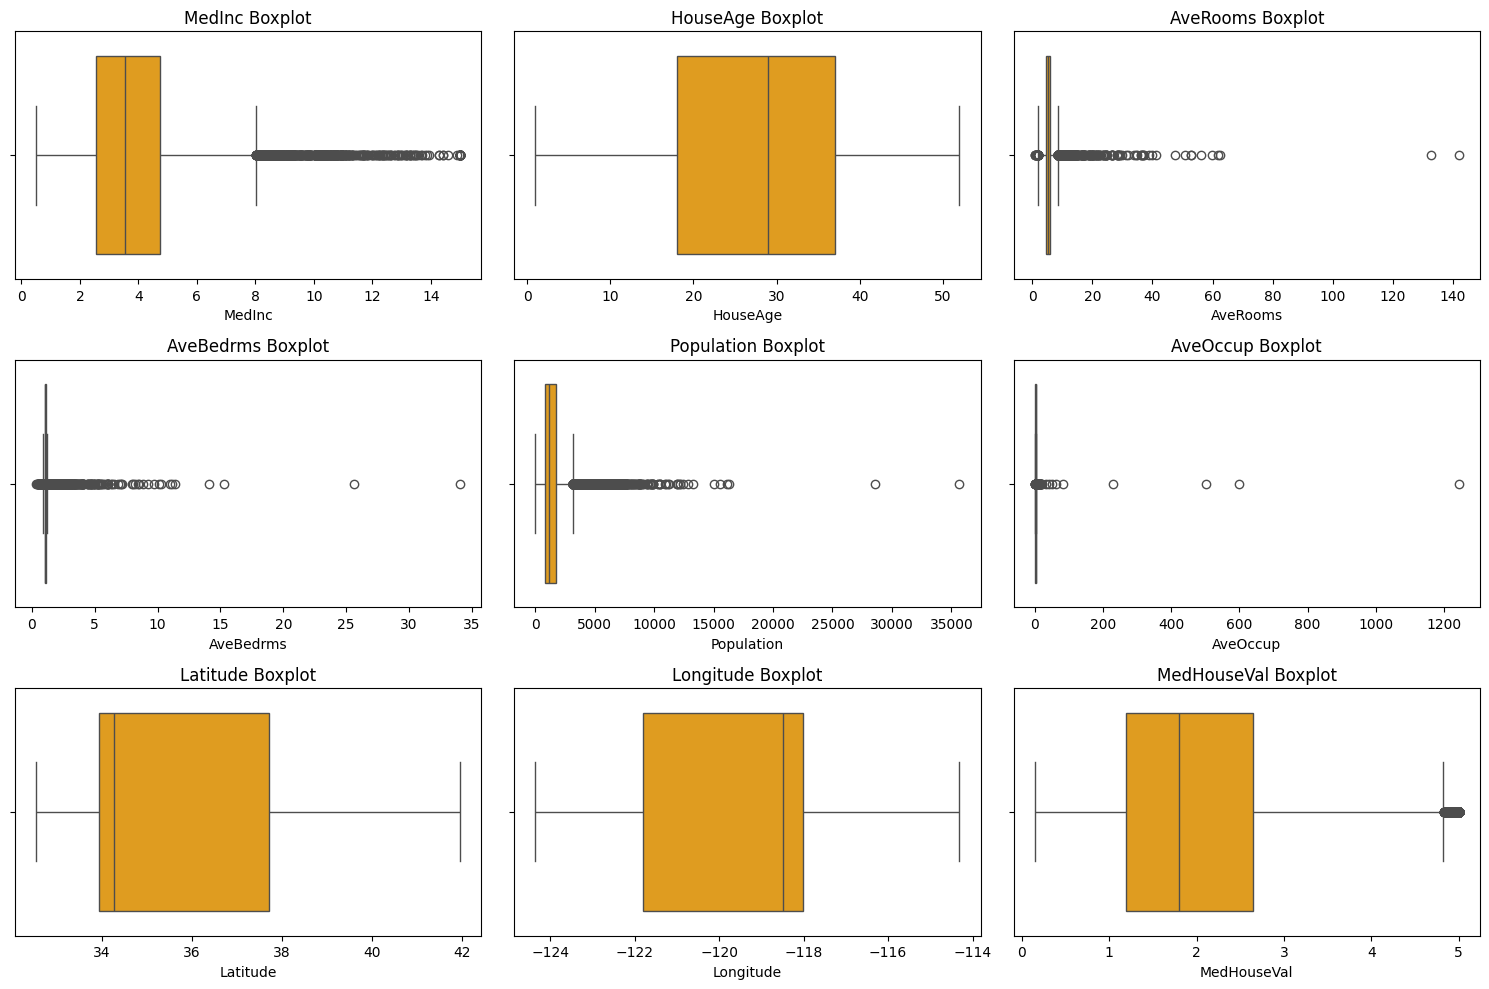

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Get numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

# Outlier detection using IQR
print("Outliers Detection:")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers = df[(df[col] < low) | (df[col] > high)]
    print(f"{col}: {len(outliers)} outliers")

# Summary of dataset
print("\nDataset Summary:")
print(df.describe())
